In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [2]:
score_boa_vista = pd.read_csv('base/score.txt', sep=';')
modelo_treinado = pd.read_csv('resultados/resultado_final.csv', sep=',')

In [4]:
score_boa_vista.columns

Index(['posicao_maxima', 'ScoreBVS', 'ID_VINCULO', 'co_ope', 'dias_atraso',
       'dt_rec', 'dt_inc', 'dt_base', 'vlr_avista', 'vlr_base', 'vlr_pg',
       'ic_14004', 'ic_13002', 'ic_ss', 'ic_rj', 'ic_tele', 'ic_sombreado',
       'IC_ULTIMOS_LOTES', 'dt_nasc', 'sexo', 'renda', 'renda_liq', 'dt_relac',
       'co_cart', 'co_prof', 'cep'],
      dtype='object')

In [5]:
modelo_treinado.columns

Index(['Unnamed: 0', 'co_ope', 'dt_base', 'vlr_base', 'dt_nasc', 'sexo',
       'renda', 'renda_liq', 'dt_relac', 'co_cart', 'co_prof', 'cep',
       'predicao', 'score'],
      dtype='object')

In [46]:
if len(modelo_treinado) == len(score_boa_vista):
    modelo_treinado['ScoreBVS'] = score_boa_vista['ScoreBVS'] * 0.2
    modelo_treinado['ID_VINCULO'] = score_boa_vista['ID_VINCULO']
    modelo_treinado['pagou'] =  score_boa_vista['dt_rec'].apply(lambda x: 0 if pd.isna(x) else 1)
else:
    print("Os DataFrames não têm o mesmo número de linhas e não podem ser combinados diretamente.")
modelo_treinado.rename(columns={'score': 'MunaScore'}, inplace=True)
modelo_treinado = modelo_treinado[['ID_VINCULO', 'co_ope', 'dt_base', 'vlr_base', 'dt_nasc', 'sexo', 'renda', 'renda_liq', 'dt_relac', 'co_cart', 'co_prof', 'cep', 'ScoreBVS', 'predicao', 'MunaScore', 'pagou']]

In [57]:
modelo_treinado.sort_values('pagou', ascending=False).head(3)

,ID_VINCULO,co_ope,dt_base,vlr_base,dt_nasc,sexo,renda,renda_liq,dt_relac,co_cart,co_prof,cep,ScoreBVS,predicao,MunaScore,pagou,faixa_ScoreBVS,faixa_MunaScore
484050,{2B6FA4EB-9FD6-4EB5-8C4D-61DF30739785},23,45104,11131.60,21441.0,1,5816.73,2808.3,35589.0,28,179,280,58.6,0,46.0,1,50-74.99,25-49.99
2150207,{529946B0-37BD-4E00-BC60-E135F92751D5},20,45104,2599.74,31417.0,1,1465.70,1465.7,40908.0,65,234,647,62.6,1,90.0,1,50-74.99,75-100
470781,{DAD448C5-A56A-4AED-9F4F-C514C61A21A0},46,45205,2620.46,32094.0,0,5035.92,4155.0,42269.0,11,396,14866,51.8,0,38.0,1,50-74.99,25-49.99


/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/351343998.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_ScoreBVS = modelo_treinado.groupby(['faixa_ScoreBVS', 'pagou']).size().unstack(fill_value=0)
/var/folders/b0/y_32dyyj3bqb0dh1yml2wpb5c3s8c9/T/ipykernel_87629/351343998.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_MunaScore = modelo_treinado.groupby(['faixa_MunaScore', 'pagou']).size().unstack(fill_value=0)


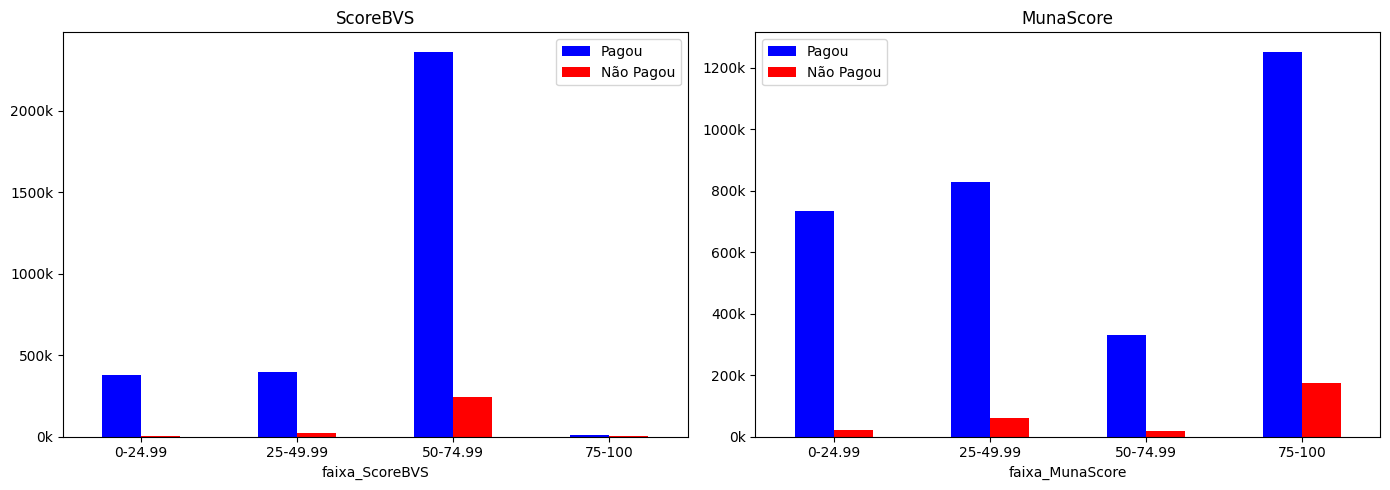

In [58]:

def k_formatter(x, pos):
    return f'{int(x/1000)}k'

bins = [0, 25, 50, 75, 100]

# Criando as faixas de score para 'ScoreBVS' e 'MunaScore'
modelo_treinado['faixa_ScoreBVS'] = pd.cut(modelo_treinado['ScoreBVS'], bins, labels=["0-24.99", "25-49.99", "50-74.99", "75-100"])
modelo_treinado['faixa_MunaScore'] = pd.cut(modelo_treinado['MunaScore'], bins, labels=["0-24.99", "25-49.99", "50-74.99", "75-100"])

# Agrupando e contando por faixas
contagem_ScoreBVS = modelo_treinado.groupby(['faixa_ScoreBVS', 'pagou']).size().unstack(fill_value=0)
contagem_MunaScore = modelo_treinado.groupby(['faixa_MunaScore', 'pagou']).size().unstack(fill_value=0)

# Configuração dos gráficos lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Define a formatação do eixo y para 'k' usando a função auxiliar
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))

# Gráfico para 'ScoreBVS'
contagem_ScoreBVS.plot(kind='bar', ax=axes[0], color=['blue', 'red'], title='ScoreBVS', rot=0)

# Gráfico para 'MunaScore'
contagem_MunaScore.plot(kind='bar', ax=axes[1], color=['blue', 'red'], title='MunaScore', rot=0)

# Adicionando legendas
axes[0].legend(["Pagou", "Não Pagou"])
axes[1].legend(["Pagou", "Não Pagou"])

# Ajustar layout
plt.tight_layout()
plt.show()